In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
model_info = ["mercedes-benz", "e-serisi", "e-350"]
model_name = "-".join(model_info)

In [3]:
raw_data = pd.read_csv(f"{model_name}.csv")
raw_data.drop(["listing_age"], axis=1, inplace=True)

In [4]:
raw_data.head()

,model,age,mileage,color,price,location,fuel,transmission
0,E 350 AMG,1,25000,Şampanya,6200000,İstanbul,benzin,otomatik
1,E 350 AMG,1,11863,Füme,6158000,Ankara,benzin,otomatik
2,E 350 AMG,6,54210,Beyaz,4555000,Kocaeli,benzin,otomatik
3,E 350 AMG,1,6001,Gri,6999999,İstanbul,benzin,otomatik
4,E 350 4Matic Edition,10,100000,Lacivert,2900000,Ankara,benzin,otomatik


In [5]:
raw_data.describe()

,age,mileage,price
count,33.000000,33.000000,3.300000e+01
mean,6.878788,96761.696970,4.396394e+06
std,6.213682,106454.927164,2.022385e+06
min,1.000000,6001.000000,9.990000e+05
25%,2.000000,15600.000000,3.490000e+06
50%,5.000000,51000.000000,4.555000e+06
75%,8.000000,149000.000000,6.158000e+06
max,19.000000,413000.000000,6.999999e+06


In [7]:
one_hot = pd.get_dummies(raw_data, columns=["color", "location", "model"], drop_first=True)
one_hot.head()

,age,mileage,price,fuel,transmission,color_Beyaz,color_Bordo,color_Füme,color_Gri,color_Kırmızı,...,location_Konya,location_Malatya,location_Muğla,location_Rize,location_İstanbul,location_İzmir,model_E 350 AMG,model_E 350 Avantgarde,model_E 350 Classic,model_E 350 Exclusive
0,1,25000,6200000,benzin,otomatik,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,1,11863,6158000,benzin,otomatik,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,6,54210,4555000,benzin,otomatik,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,6001,6999999,benzin,otomatik,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
4,10,100000,2900000,benzin,otomatik,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
one_hot["fuel"] = LabelEncoder().fit_transform(one_hot["fuel"])
one_hot["transmission"] = LabelEncoder().fit_transform(one_hot["transmission"])

In [9]:
sorted_by_value = dict(sorted(one_hot.corr()["price"].to_dict().items(), key=lambda item: item[1]))
sorted_by_value

{'age': -0.9787198871592652,
 'mileage': -0.9039429714881361,
 'model_E 350 Avantgarde': -0.6575658134567245,
 'color_Siyah': -0.587378621068568,
 'fuel': -0.5337538160886245,
 'model_E 350 Classic': -0.4118186423843226,
 'location_Muğla': -0.2926053009667281,
 'location_Rize': -0.2868355583063061,
 'location_Kocaeli': -0.19882399092008493,
 'location_İzmir': -0.1985051366514259,
 'color_Lacivert': -0.08067399649807806,
 'model_E 350 Exclusive': -0.07925364017294496,
 'location_Konya': -0.04628167200255448,
 'color_Kırmızı': 0.011415754601666106,
 'location_Ankara': 0.021220250877418776,
 'color_Şampanya': 0.059059571319991414,
 'location_Denizli': 0.1318278856793386,
 'color_Gri': 0.18539533904320304,
 'color_Füme': 0.20883828149187286,
 'location_Malatya': 0.22667153847125934,
 'color_Bordo': 0.25516293070103224,
 'price': 1.0,
 'transmission': nan,
 'color_Beyaz': 0.1783015659793283,
 'location_İstanbul': 0.24982058605628826,
 'model_E 350 AMG': 0.8497361004980835}

In [10]:
label_encoders = {}
data = raw_data.copy()
for column in ["fuel", "transmission", "color", "location", "model"]:
    le = LabelEncoder()
    data[column] = le.fit_transform(raw_data[column])
    label_encoders[column] = le

In [11]:
data.head()

,model,age,mileage,color,price,location,fuel,transmission
0,1,1,25000,8,6200000,8,0,0
1,1,1,11863,3,6158000,1,0,0
2,1,6,54210,1,4555000,3,0,0
3,1,1,6001,4,6999999,8,0,0
4,0,10,100000,6,2900000,1,0,0


In [12]:
correlation_metrics = pd.DataFrame(data.corr()["price"]).sort_values(by="price")
correlation_metrics

,price
age,-0.978720
mileage,-0.903943
model,-0.559915
fuel,-0.533754
color,-0.525293
location,0.006004
price,1.000000
transmission,NaN


In [13]:
x = data["price"].tolist()
x.sort()

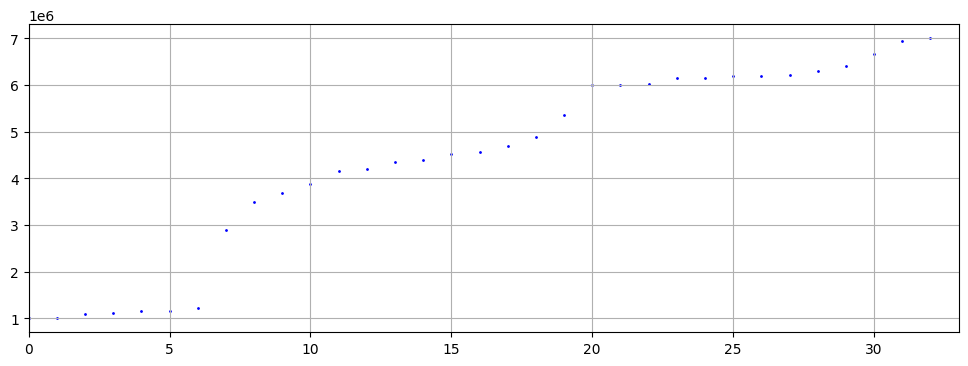

In [14]:
plt.figure(figsize=(12,4))
plt.scatter(np.arange(len(x)), x, marker="o", color="b", s=1)
plt.xlim(0, len(x))
plt.grid(True)
plt.ylabel = "Price"
# plt.xlabel 
plt.show()

<Axes: ylabel='Frequency'>

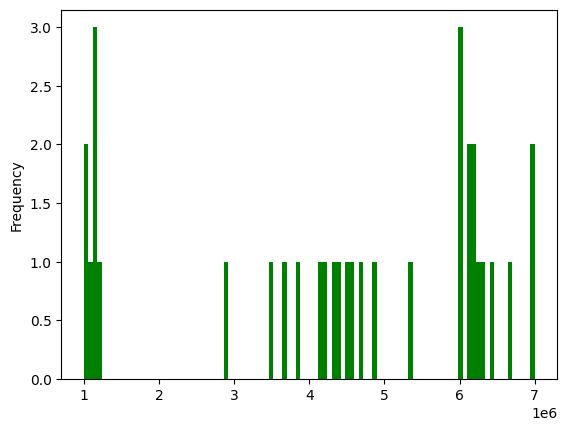

In [15]:
data.price.plot(kind="hist", bins=100, color="g")

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
x = data.drop(["price"], axis=1).values

In [19]:
y = data.price.values.reshape(-1, 1)

In [20]:
lr.fit(x, y)

LinearRegression()

In [21]:
# lr.predict(x)

In [22]:
linear_regresssion_df = pd.DataFrame([y.flatten().tolist(), lr.predict(x).flatten().tolist()]).T

In [23]:
linear_regresssion_df.columns = ["price_real", "price_predicted"]

In [24]:
linear_regresssion_df["variation"] = abs((linear_regresssion_df["price_predicted"]-linear_regresssion_df["price_real"]) / linear_regresssion_df["price_real"] * 100)

In [25]:
linear_regresssion_df.head()

,price_real,price_predicted,variation
0,6200000.0,6.369525e+06,2.734268
1,6158000.0,6.336054e+06,2.891427
2,4555000.0,4.690910e+06,2.983749
3,6999999.0,6.263094e+06,10.527218
4,2900000.0,3.609628e+06,24.469934


In [26]:
# Average deviation
linear_regresssion_df.variation.mean()

9.870155448788449

In [27]:
individual_test_data = {
    "model": "E 350 4Matic Edition",
    "fuel": "dizel",
    "transmission": "otomatik",
    "color": "Siyah",
    "location": "İzmir",
    "age": 10,
    "mileage": 87000
}

In [28]:
individual_test_df = pd.DataFrame(columns=["model"], data=["a"])
for label in data.columns.tolist():
    if label == "price":
        continue
    individual_test_df[label] = individual_test_data[label]

In [29]:
for column in ["fuel", "transmission", "color", "location", "model"]:
    individual_test_df[column] = label_encoders[column].transform(individual_test_df[column])

In [30]:
individual_test_df = individual_test_df.values.reshape(-1, individual_test_df.shape[1])

In [31]:
lr.predict(individual_test_df)[0, 0].round(-2)

3240700.0